In [1]:
#importing required libraries for data analysis
import pandas as pd
import numpy as np
import time

# Import models from sklearn
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.linear_model import LinearRegression,ElasticNet,Ridge,Lasso,LassoCV,RidgeCV
from sklearn.svm import SVR,LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
#import xgboost as xgb
from xgboost import XGBRegressor

# Import evaluation metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

#Visuals
import matplotlib.pyplot as plt

In [2]:
# Read the training & test datasets from Part1-Preprocessing part

X_train=pd.read_csv("../datasets/regression/processed/X_train.csv", index_col=0)
y_train=pd.read_csv("../datasets/regression/processed/y_train.csv", index_col=0)
                    
X_test=pd.read_csv("../datasets/regression/processed/X_test.csv", index_col=0)
y_test=pd.read_csv("../datasets/regression/processed/y_test.csv", index_col=0)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(896, 31) (427, 31) (896, 1) (427, 1)


## 1. Linear Regression Model

In [3]:
# Importing the Linear Regression Model
lrmodel = LinearRegression()
start = time.time()
#Train the model
lrmodel.fit(X_train, y_train)
stop = time.time()

# predicting the y test observations
y_pred = lrmodel.predict(X_test)
y_train_pred = lrmodel.predict(X_train)

### Equation

In [4]:
# y = beta0 + beta1 * X1 + beta2 * X3 +...+ E
intercept= lrmodel.intercept_[0]
coefficients=lrmodel.coef_[0]
print("y =",intercept," + ")
for i in range(len(coefficients)):
    print(coefficients[i],"*",X_train.columns[i]," + ", end="")
print(" E")

y = 10.502825840975369  + 
0.012285168703952415 * Electrical_SBrkr  + 0.0001283896359290694 * WoodDeckSF  + -0.002342708471204961 * RemodAge  + 0.04645802522500953 * LotConfig_CulDSac  + 1.1349484969964197e-05 * LotArea  + 0.045334947684577166 * Foundation_PConc  + 0.040918295818069224 * BsmtExposure_Gd  + 0.00022119813603870431 * OpenPorchSF  + 0.08682727487321786 * OverallQual  + -0.054948675820363085 * Fence_GdWo  + -0.01495278000070394 * Foundation_BrkTil  + -0.03586949717590473 * Electrical_FuseF  + 0.0014611459249766637 * LotFrontage_median  + 1.2246473970369746e-07 * BedroomAbvGr  + 0.05737703685109008 * FullBath  + 0.00030697404359095583 * firstFlrSF  + 0.1097217678938994 * HouseStyle_2Story  + 0.01038912124775211 * LotConfig_Inside  + 0.08723385758709468 * hasGarage  + -0.025087261222466167 * BsmtExposure_No  + -0.04852865577796969 * BldgType_Twnhs  + 0.06445508235829026 * HalfBath  + 0.06960575018945706 * BsmtFullBath  + 0.11157513670116886 * CentralAir_Y  + -0.12495289788526

Text(0, 0.5, 'y_pred_manual')

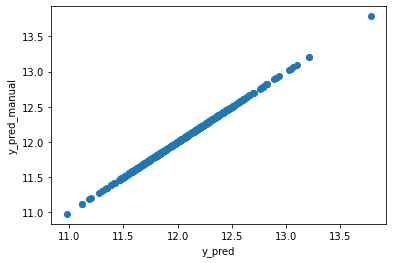

In [5]:
# predicting the y test observations manually
y_pred_mn=intercept + np.sum(coefficients * X_test, axis=1)
plt.scatter(y_pred_mn,y_pred)
plt.xlabel("y_pred")
plt.ylabel("y_pred_manual")

### Feature Importance 

In regression analysis, the magnitude of your coefficients is not necessarily related to their importance. The most common criteria to determine the importance of independent variables in regression analysis are p-values. Small p-values imply high levels of importance, whereas high p-values mean that a variable is not statistically significant. 

In [6]:
stdevs= []
for i in X_train.columns:
    stdev=X_train[i].std()
    stdevs.append(stdev)

In [7]:
features=pd.DataFrame(coefficients, X_train.columns, columns=['coef'])

#normalized feature importance 
features['importance']=np.array(stdevs)*features["coef"].abs()/max(np.array(stdevs)*features["coef"].abs()) 
features = features.sort_values(by = "importance")
features.reset_index(inplace=True)
features = features.rename(columns = {'index':'features'})

Text(0.5, 0, 'Feature Importance')

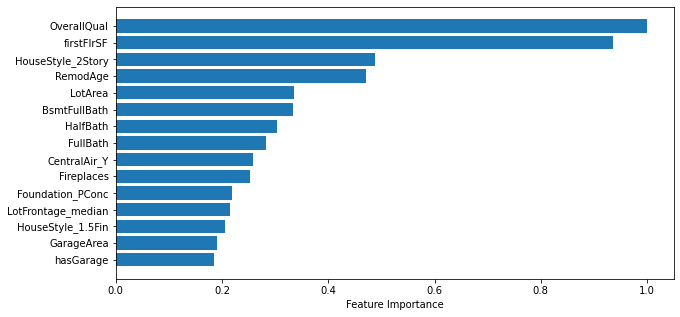

In [8]:
#Feature Importance
plt.figure(figsize=(10,5))
plt.barh(features['features'][-15:], features['importance'][-15:])
plt.xlabel("Feature Importance")

### Model Evaluation

In [9]:
#Model Evaluation
lrm_trscore = round(lrmodel.score(X_train, y_train),3)
lrm_tescore = round(lrmodel.score(X_test, y_test),3)
lrm_r2= round(r2_score(y_test,y_pred),3) #coefficient of determination
lrm_adj= round(1 - (1-lrm_r2)*(len(y_test)-1)/(len(y_test)-len(X_test.columns)-1),3)
lrm_mae= round(mean_absolute_error(y_test,y_pred),3)                      
lrm_mse= round(mean_squared_error(y_test,y_pred),3)
lrm_rmse= round(np.sqrt(mean_squared_error(y_test,y_pred)),3)
lrm_feat=np.array(features['features'][::-1][:3])
#Training time of the model
lrm_time=stop-start

results = pd.DataFrame([['Linear Regression', lrm_trscore, lrm_tescore, lrm_adj, lrm_mae, lrm_mse, lrm_rmse, lrm_time, lrm_feat]],
               columns = ['Model', 'Train Score', 'Test Score/R-Square','Adjusted R^2', 'MAE', 'MSE', 'RMSE', "Training Time(s)","Important Features"])
pd.set_option('display.max_colwidth', 100)
results

,Model,Train Score,Test Score/R-Square,Adjusted R^2,MAE,MSE,RMSE,Training Time(s),Important Features
0,Linear Regression,0.842,0.826,0.812,0.11,0.026,0.161,0.009761,"[OverallQual, firstFlrSF, HouseStyle_2Story]"


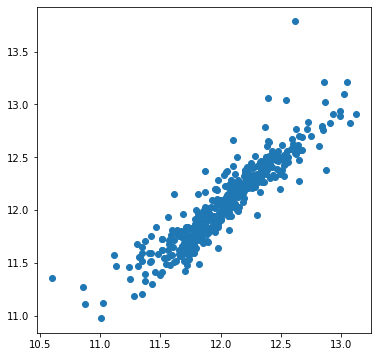

In [10]:
# Test vs Prediction
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred)

## 2. Ridge Regression

In [11]:
# Importing the Ridge Regression
ridge_reg = Ridge() 
start = time.time()
ridge_reg.fit(X_train, y_train)
stop = time.time()

# predicting the y test observations
y_pred = ridge_reg.predict(X_test)
y_train_pred = ridge_reg.predict(X_train)

### Feature Importance 

Text(0.5, 0, 'Feature Importance')

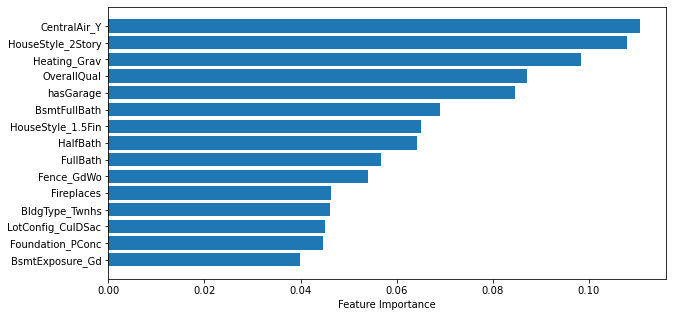

In [12]:
coefficients=ridge_reg.coef_[0]
#coefficients
#X_train.columns
importances = pd.DataFrame(data={
    'Feature': X_train.columns,
    'Importance': coefficients
})
importances['Importance']=importances['Importance'].abs()
importances = importances.sort_values(by='Importance')

plt.figure(figsize=(10,5))
plt.barh( importances['Feature'][-15:],importances['Importance'][-15:])
plt.xlabel("Feature Importance")

### Model Evaluation

In [13]:
#Model Evaluation
ridge_trscore = round(ridge_reg.score(X_train, y_train),3)
ridge_tescore = round(ridge_reg.score(X_test, y_test),3)
ridge_r2= round(r2_score(y_test,y_pred),3)
ridge_adj= round(1 - (1-ridge_r2)*(len(y_test)-1)/(len(y_test)-len(X_test.columns)-1),3)
ridge_mae= round(mean_absolute_error(y_test,y_pred),3)                      
ridge_mse= round(mean_squared_error(y_test,y_pred),3)
ridge_rmse= round(np.sqrt(mean_squared_error(y_test,y_pred)),3)
ridge_feat=np.array(importances['Feature'][::-1][:3])
#Training time of the model
ridge_time=stop-start

results = pd.DataFrame([['Ridge', ridge_trscore, ridge_tescore, ridge_adj, ridge_mae, ridge_mse, ridge_rmse, ridge_time, ridge_feat]],
               columns = ['Model', 'Train Score', 'Test Score/R-Square','Adjusted R^2', 'MAE', 'MSE', 'RMSE', "Training Time(s)","Important Features"])
results

,Model,Train Score,Test Score/R-Square,Adjusted R^2,MAE,MSE,RMSE,Training Time(s),Important Features
0,Ridge,0.842,0.826,0.812,0.11,0.026,0.161,0.004876,"[CentralAir_Y, HouseStyle_2Story, Heating_Grav]"


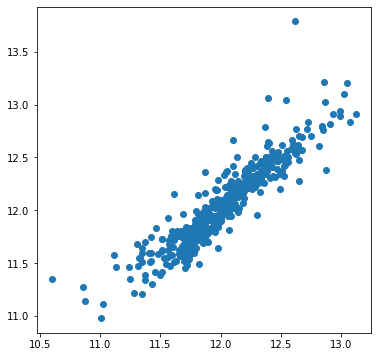

In [14]:
# Test vs Prediction
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred)

## 3. Lasso Regression

In [15]:
# Importing the LASSO Regression
lasso_reg = Lasso() 
start = time.time()

#fitting
lasso_reg.fit(X_train, y_train)
stop = time.time()

# predicting the y test observations
y_pred = lasso_reg.predict(X_test)
y_train_pred = lasso_reg.predict(X_train)

### Model Evaluation

In [16]:
#Model Evaluation
lasso_trscore = round(lasso_reg.score(X_train, y_train),3)
lasso_tescore = round(lasso_reg.score(X_test, y_test),3)
lasso_r2= round(r2_score(y_test,y_pred),3)
lasso_adj= round(1 - (1-lasso_r2)*(len(y_test)-1)/(len(y_test)-len(X_test.columns)-1),3)
lasso_mae= round(mean_absolute_error(y_test,y_pred),3)                      
lasso_mse= round(mean_squared_error(y_test,y_pred),3)
lasso_rmse= round(np.sqrt(mean_squared_error(y_test,y_pred)),3)
lasso_feat=""
#Training time of the model
lasso_time=stop-start

results = pd.DataFrame([['Lasso', lasso_trscore, lasso_tescore, lasso_adj, lasso_mae, lasso_mse, lasso_rmse, lasso_time, lasso_feat]],
               columns = ['Model', 'Train Score', 'Test Score/R-Square','Adjusted R^2', 'MAE', 'MSE', 'RMSE', "Training Time(s)","Important Features"])
results

,Model,Train Score,Test Score/R-Square,Adjusted R^2,MAE,MSE,RMSE,Training Time(s),Important Features
0,Lasso,0.635,0.579,0.546,0.171,0.063,0.25,0.021218,


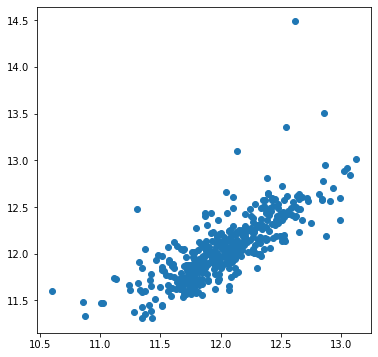

In [17]:
# Test vs Prediction
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred)

## 4. ElasticNet

In [18]:
# Importing the ElasticNet Regression
eNet_reg = ElasticNet()
start = time.time()

#fitting
eNet_reg.fit(X_train, y_train)
stop = time.time()

# predicting the y test observations
y_pred = eNet_reg.predict(X_test)
y_train_pred = eNet_reg.predict(X_train)

In [19]:
#Model Evaluation
enet_trscore = round(eNet_reg.score(X_train, y_train),3)
enet_tescore = round(eNet_reg.score(X_test, y_test),3)
enet_r2= round(r2_score(y_test,y_pred),3)
enet_adj= round(1 - (1-enet_r2)*(len(y_test)-1)/(len(y_test)-len(X_test.columns)-1),3)
enet_mae= round(mean_absolute_error(y_test,y_pred),3)                      
enet_mse= round(mean_squared_error(y_test,y_pred),3)
enet_rmse= round(np.sqrt(mean_squared_error(y_test,y_pred)),3)
enet_feat=""
#Training time of the model
enet_time=stop-start

results = pd.DataFrame([['ElasticNet', enet_trscore, enet_tescore, enet_adj, enet_mae, enet_mse, enet_rmse, enet_time, enet_feat]],
               columns = ['Model', 'Train Score', 'Test Score/R-Square','Adjusted R^2', 'MAE', 'MSE', 'RMSE', "Training Time(s)","Important Features"])
results

,Model,Train Score,Test Score/R-Square,Adjusted R^2,MAE,MSE,RMSE,Training Time(s),Important Features
0,ElasticNet,0.651,0.583,0.55,0.171,0.062,0.249,0.014665,


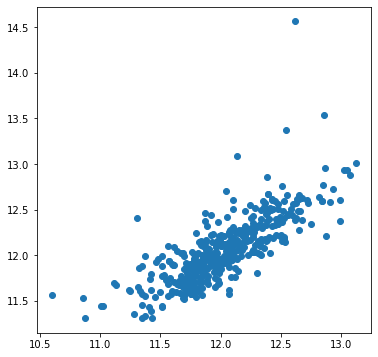

In [20]:
# Test vs Prediction
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred)

## 5. Decision Tree Regressor

In [21]:
# Importing the Decision Tree Regressor
dtr = DecisionTreeRegressor()
start = time.time()
#Fitting data into Decision Tree Regressor
dtr.fit(X_train, y_train)
stop = time.time()

# predicting the y test observations
y_pred = dtr.predict(X_test)
y_train_pred = dtr.predict(X_train)

Text(0.5, 0, 'Feature Importance')

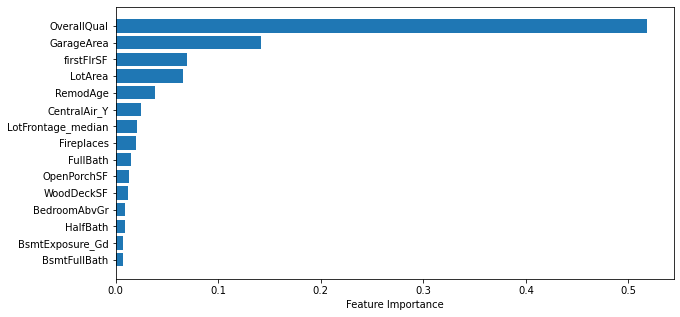

In [22]:
#Feature Importance
sort = dtr.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(X_train.columns[sort[-15:]], dtr.feature_importances_[sort[-15:]])
plt.xlabel("Feature Importance")

In [23]:
#Model Evaluation

dtr_trscore = round(dtr.score(X_train, y_train),3)
dtr_tescore = round(dtr.score(X_test, y_test),3)
dtr_r2= round(r2_score(y_test,y_pred),3)
dtr_adj= round(1 - (1-dtr_r2)*(len(y_test)-1)/(len(y_test)-len(X_test.columns)-1),3)
dtr_mae= round(mean_absolute_error(y_test,y_pred),3)                      
dtr_mse= round(mean_squared_error(y_test,y_pred),3)
dtr_rmse= round(np.sqrt(mean_squared_error(y_test,y_pred)),3)
dtr_feat = dict(zip(X_train.columns[sort[::-1][:3]], np.round(dtr.feature_importances_[sort[::-1][:3]],3)))
#Training time of the model
dtr_time=stop-start

results = pd.DataFrame([['Decision Trees', dtr_trscore, dtr_tescore, dtr_adj, dtr_mae, dtr_mse, dtr_rmse, dtr_time, dtr_feat]],
               columns = ['Model', 'Train Score', 'Test Score/R-Square','Adjusted R^2', 'MAE', 'MSE', 'RMSE', "Training Time(s)","Important Features"])
results

,Model,Train Score,Test Score/R-Square,Adjusted R^2,MAE,MSE,RMSE,Training Time(s),Important Features
0,Decision Trees,1.0,0.608,0.577,0.178,0.058,0.241,0.00668,"{'OverallQual': 0.518, 'GarageArea': 0.142, 'firstFlrSF': 0.069}"


Text(0, 0.5, 'Actual')

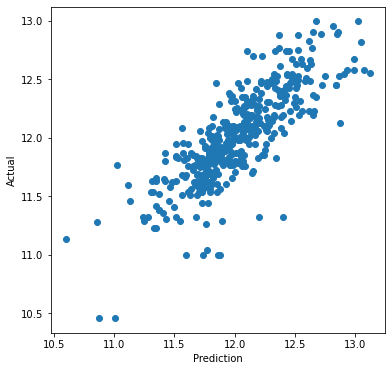

In [24]:
# Test vs Prediction
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred)
plt.xlabel("Prediction")
plt.ylabel("Actual")

## 6. Bagging

In [25]:
# Importing the Bagging Regressor
bag = BaggingRegressor(base_estimator=DecisionTreeRegressor()) #default base estimator is desicion tree
start = time.time()
#Fitting data into Bagging Regressor
bag.fit(X_train, y_train)
stop = time.time()

# predicting the y test observations
y_pred = bag.predict(X_test)
y_train_pred = bag.predict(X_train)

/home/neslihankeskin/miniconda3/envs/datascience-bootcamp/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:470: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


### Feature Importance

Text(0.5, 1.0, 'Feature Importance')

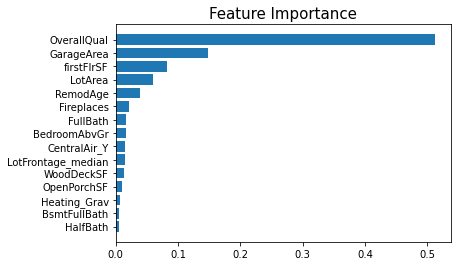

In [26]:
#avg of importance among all trees
feature_importances = np.mean([
    tree.feature_importances_ for tree in bag.estimators_
], axis=0)
sort=feature_importances.argsort()
plt.barh(X_train.columns[sort[-15:]], feature_importances[sort[-15:]])
plt.title('Feature Importance', size=15)

In [27]:
bag_feat=dict(zip(X_train.columns[sort[::-1][:3]], np.round(feature_importances[sort[::-1][:3]],3)))
bag_feat

{'OverallQual': 0.512, 'GarageArea': 0.147, 'firstFlrSF': 0.082}

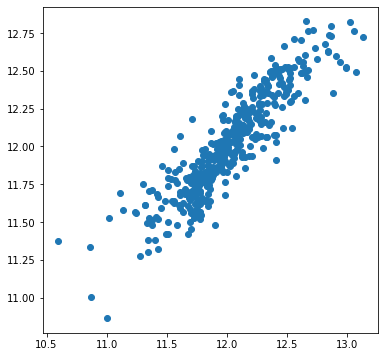

In [28]:
# Test vs Prediction
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred)

In [29]:
#Model Evaluation
bag_trscore = round(bag.score(X_train, y_train),3)
bag_tescore = round(bag.score(X_test, y_test),3)
bag_r2= round(r2_score(y_test,y_pred),3)
bag_adj= round(1 - (1-bag_r2)*(len(y_test)-1)/(len(y_test)-len(X_test.columns)-1),3)
bag_mae= round(mean_absolute_error(y_test,y_pred),3)                      
bag_mse= round(mean_squared_error(y_test,y_pred),3)
bag_rmse= round(np.sqrt(mean_squared_error(y_test,y_pred)),3)
bag_feat=dict(zip(X_train.columns[sort[::-1][:3]], np.round(feature_importances[sort[::-1][:3]],3)))
#Training time of the model
bag_time=stop-start

results = pd.DataFrame([['Bagging Regressor', bag_trscore, bag_tescore, bag_adj, bag_mae, bag_mse, bag_rmse, bag_time, bag_feat]],
               columns = ['Model', 'Train Score', 'Test Score/R-Square','Adjusted R^2', 'MAE', 'MSE', 'RMSE', "Training Time(s)","Important Features"])
results

#[lrm_trscore,lrm_tescore,lrm_r2,lrm_mae,lrm_mse,lrm_rmse,lrm_time]
#[lrm_time, ridge_time, lasso_time, enet_time, dtr_time, rfr_time, gbr_time, xgr_time, ada_time]

,Model,Train Score,Test Score/R-Square,Adjusted R^2,MAE,MSE,RMSE,Training Time(s),Important Features
0,Bagging Regressor,0.954,0.806,0.791,0.125,0.029,0.17,0.034521,"{'OverallQual': 0.512, 'GarageArea': 0.147, 'firstFlrSF': 0.082}"


## 7. Random Forest

In [30]:
# Importing the Random Forest Regressor
rfr= RandomForestRegressor()
start = time.time()
print(start)
#Fitting data into Random Forest Regressor
rfr.fit(X_train, y_train)
stop = time.time()
print(stop)
print("dif",stop-start)
# predicting the y test observations
y_pred = rfr.predict(X_test)
y_train_pred = rfr.predict(X_train)

1660300190.2979467


/tmp/ipykernel_3912/831225596.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


1660300190.5840597
dif 0.28611302375793457


Text(0.5, 1.0, 'Feature Importance')

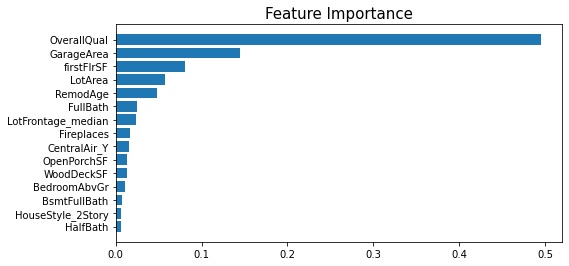

In [31]:
#Feature Importance
sort = rfr.feature_importances_.argsort()
plt.figure(figsize=(8,4))
plt.barh(X_train.columns[sort[-15:]], rfr.feature_importances_[sort[-15:]])
plt.title('Feature Importance', size=15)
#plt.xlabel("Feature Importance")

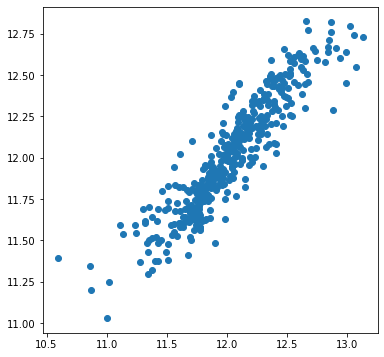

In [32]:
# Test vs Prediction
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred)

In [33]:
#Model Evaluation
rfr_trscore = round(rfr.score(X_train, y_train),3)
rfr_tescore = round(rfr.score(X_test, y_test),3)
rfr_r2= round(r2_score(y_test,y_pred),3)
rfr_adj= round(1 - (1-rfr_r2)*(len(y_test)-1)/(len(y_test)-len(X_test.columns)-1),3)
rfr_mae= round(mean_absolute_error(y_test,y_pred),3)                      
rfr_mse= round(mean_squared_error(y_test,y_pred),3)
rfr_rmse= round(np.sqrt(mean_squared_error(y_test,y_pred)),3)
rfr_feat = dict(zip(X_train.columns[sort[::-1][:3]], np.round(rfr.feature_importances_[sort[::-1][:3]],3)))
#Training time of the model
rfr_time=stop-start

results = pd.DataFrame([['Random Forest', rfr_trscore, rfr_tescore, rfr_adj, rfr_mae, rfr_mse, rfr_rmse, rfr_time, rfr_feat]],
               columns = ['Model', 'Train Score', 'Test Score/R-Square','Adjusted R^2', 'MAE', 'MSE', 'RMSE', "Training Time(s)","Important Features"])
results

,Model,Train Score,Test Score/R-Square,Adjusted R^2,MAE,MSE,RMSE,Training Time(s),Important Features
0,Random Forest,0.971,0.834,0.821,0.112,0.025,0.157,0.286113,"{'OverallQual': 0.495, 'GarageArea': 0.145, 'firstFlrSF': 0.081}"


## 8. Gradient Boosting

In [34]:
# Importing the Gradient Boosting Regressor
gbr = GradientBoostingRegressor()
start = time.time()
#Fitting data into Gradient Boosting Regressor
gbr.fit(X_train, y_train)
stop = time.time()

# predicting the y test observations
y_pred = gbr.predict(X_test)
y_train_pred = gbr.predict(X_train)

/home/neslihankeskin/miniconda3/envs/datascience-bootcamp/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'Feature Importance')

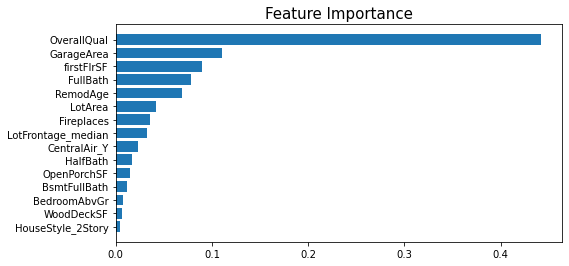

In [35]:
#Feature Importance
sort = gbr.feature_importances_.argsort()
plt.figure(figsize=(8,4))
plt.barh(X_train.columns[sort[-15:]], gbr.feature_importances_[sort[-15:]])
plt.title('Feature Importance', size=15)
#plt.xlabel("Feature Importance")

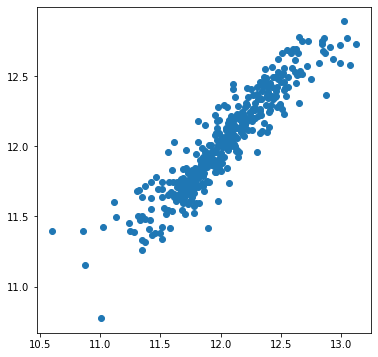

In [36]:
# Test vs Prediction
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred)

In [37]:
#Model Evaluation
gbr_trscore = round(gbr.score(X_train, y_train),3)
gbr_tescore = round(gbr.score(X_test, y_test),3)
gbr_r2= round(r2_score(y_test,y_pred),3)
gbr_adj= round(1 - (1-gbr_r2)*(len(y_test)-1)/(len(y_test)-len(X_test.columns)-1),3)
gbr_mae= round(mean_absolute_error(y_test,y_pred),3)                      
gbr_mse= round(mean_squared_error(y_test,y_pred),3)
gbr_rmse= round(np.sqrt(mean_squared_error(y_test,y_pred)),3)
gbr_feat = dict(zip(X_train.columns[sort[::-1][:3]], np.round(gbr.feature_importances_[sort[::-1][:3]],3)))
#Training time of the model
gbr_time=stop-start
results = pd.DataFrame([['Gradient Boosting', gbr_trscore, gbr_tescore, gbr_adj, gbr_mae, gbr_mse, gbr_rmse, gbr_time, gbr_feat]],
               columns = ['Model', 'Train Score', 'Test Score/R-Square','Adjusted R^2', 'MAE', 'MSE', 'RMSE', "Training Time(s)","Important Features"])
results

,Model,Train Score,Test Score/R-Square,Adjusted R^2,MAE,MSE,RMSE,Training Time(s),Important Features
0,Gradient Boosting,0.922,0.855,0.844,0.104,0.022,0.147,0.115028,"{'OverallQual': 0.442, 'GarageArea': 0.111, 'firstFlrSF': 0.089}"


## 9. XG Boosting

In [38]:
# Importing the XG Boosting Regressor
xgb = XGBRegressor()
start = time.time()
#Fitting data into XG Boosting Regressor
xgb.fit(X_train, y_train)
stop = time.time()

# predicting the y test observations
y_pred = xgb.predict(X_test)
y_train_pred = xgb.predict(X_train)

Text(0.5, 1.0, 'Feature Importance')

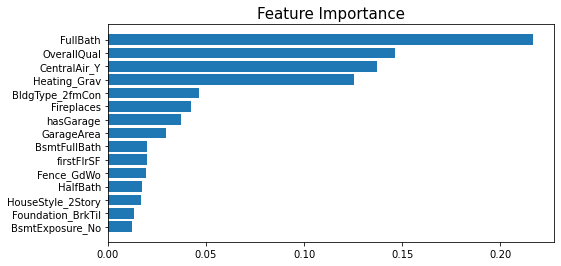

In [39]:
#Feature Importance
sort = xgb.feature_importances_.argsort()
plt.figure(figsize=(8,4))
plt.barh(X_train.columns[sort[-15:]], xgb.feature_importances_[sort[-15:]])
plt.title('Feature Importance', size=15)

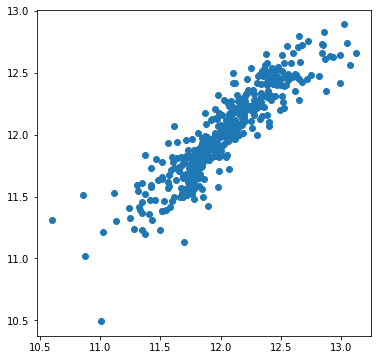

In [40]:
# Test vs Prediction
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred)

In [41]:
#Model Evaluation
xgb_trscore = round(xgb.score(X_train, y_train),3)
xgb_tescore = round(xgb.score(X_test, y_test),3)
xgb_r2= round(r2_score(y_test,y_pred),3)
xgb_adj= round(1 - (1-xgb_r2)*(len(y_test)-1)/(len(y_test)-len(X_test.columns)-1),3)
xgb_mae= round(mean_absolute_error(y_test,y_pred),3)                      
xgb_mse= round(mean_squared_error(y_test,y_pred),3)
xgb_rmse= round(np.sqrt(mean_squared_error(y_test,y_pred)),3)
xgb_feat=dict(zip(X_train.columns[sort[::-1][:3]], np.round(xgb.feature_importances_[sort[::-1][:3]],3)))

#Training time of the model
xgb_time=stop-start

results = pd.DataFrame([['XGB', xgb_trscore, xgb_tescore, xgb_adj, xgb_mae, xgb_mse, xgb_rmse, xgb_time, xgb_feat]],
               columns = ['Model', 'Train Score', 'Test Score/R-Square','Adjusted R^2', 'MAE', 'MSE', 'RMSE', "Training Time(s)","Important Features"])
results

,Model,Train Score,Test Score/R-Square,Adjusted R^2,MAE,MSE,RMSE,Training Time(s),Important Features
0,XGB,1.0,0.82,0.806,0.12,0.027,0.163,0.544219,"{'FullBath': 0.217, 'OverallQual': 0.146, 'CentralAir_Y': 0.137}"


## 10. Ada Boosting

In [42]:
# Importing the Ada Boosting Regressor
ada = AdaBoostRegressor()
start = time.time()
#Fitting data into Ada Boosting Regressor
ada.fit(X_train, y_train)
stop = time.time()

# predicting the y test observations
y_pred = ada.predict(X_test)
y_train_pred = ada.predict(X_train)

/home/neslihankeskin/miniconda3/envs/datascience-bootcamp/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'Feature Importance')

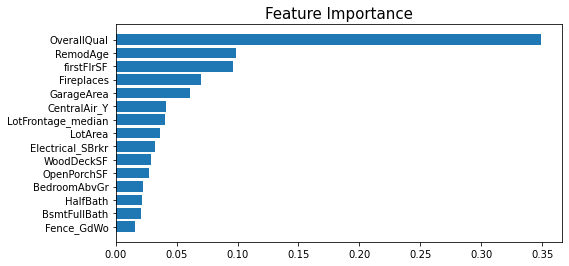

In [43]:
#Feature Importance
sort = ada.feature_importances_.argsort()
plt.figure(figsize=(8,4))
plt.barh(X_train.columns[sort[-15:]], ada.feature_importances_[sort[-15:]])
plt.title('Feature Importance', size=15)

In [44]:
ada.feature_importances_

array([0.03233701, 0.0291828 , 0.09860535, 0.        , 0.03654244,
       0.0141343 , 0.00058002, 0.02742301, 0.34886841, 0.01614739,
       0.00585539, 0.        , 0.0401748 , 0.02235526, 0.00497886,
       0.0958588 , 0.00211461, 0.00221361, 0.00121954, 0.00277724,
       0.        , 0.02156994, 0.02093784, 0.04116026, 0.        ,
       0.        , 0.00399714, 0.        , 0.07016013, 0.06080585,
       0.        ])

In [46]:
ada.get_params()

{'base_estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': None}

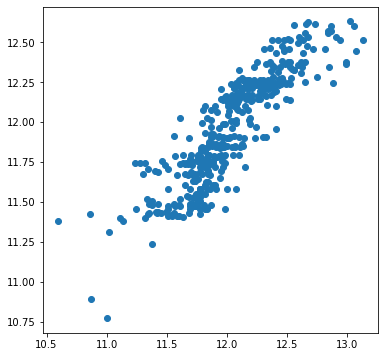

In [47]:
# Test vs Prediction
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred)

In [48]:
#Model Evaluation
ada_trscore = round(ada.score(X_train, y_train),3)
ada_tescore = round(ada.score(X_test, y_test),3)
ada_r2= round(r2_score(y_test,y_pred),3)
ada_adj= round(1 - (1-ada_r2)*(len(y_test)-1)/(len(y_test)-len(X_test.columns)-1),3)
ada_mae= round(mean_absolute_error(y_test,y_pred),3)                      
ada_mse= round(mean_squared_error(y_test,y_pred),3)
ada_rmse= round(np.sqrt(mean_squared_error(y_test,y_pred)),3)
ada_feat=dict(zip(X_train.columns[sort[::-1][:3]], np.round(ada.feature_importances_[sort[::-1][:3]],3)))
#Training time of the model
ada_time=stop-start

results = pd.DataFrame([['ADA Boosting', ada_trscore, ada_tescore, ada_adj, ada_mae, ada_mse, ada_rmse, ada_time, ada_feat]],
               columns = ['Model', 'Train Score', 'Test Score/R-Square','Adjusted R^2', 'MAE', 'MSE', 'RMSE', "Training Time(s)","Important Features"])
results

#[lrm_trscore,lrm_tescore,lrm_r2,lrm_mae,lrm_mse,lrm_rmse,lrm_time]
#[lrm_time, ridge_time, lasso_time, enet_time, dtr_time, rfr_time, gbr_time, xgr_time, ada_time]

,Model,Train Score,Test Score/R-Square,Adjusted R^2,MAE,MSE,RMSE,Training Time(s),Important Features
0,ADA Boosting,0.788,0.734,0.713,0.154,0.039,0.199,0.07346,"{'OverallQual': 0.349, 'RemodAge': 0.099, 'firstFlrSF': 0.096}"


## Baseline Model Comprasion

In [49]:
all_regressors = ['Linear Regression', 'Ridge', 'Lasso', 'ElasticNet', 'Decision Tree', "Bagging Regressor", 'Random Forest',
                  'Gradient Boosting', 'XG Boosting', 'Ada Boosting']

train_score= [lrm_trscore, ridge_trscore, lasso_trscore, enet_trscore, dtr_trscore, bag_trscore, rfr_trscore, gbr_trscore, xgb_trscore, ada_trscore]
test_score = [lrm_tescore, ridge_tescore, lasso_tescore, enet_tescore, dtr_tescore, bag_tescore, rfr_tescore, gbr_tescore, xgb_tescore, ada_tescore]
adj_rsq =    [lrm_adj, ridge_adj, lasso_adj, enet_adj, dtr_adj, bag_adj, rfr_adj, gbr_adj, xgb_adj, ada_adj]
MAE =        [lrm_mae, ridge_mae, lasso_mae, enet_mae, dtr_mae, bag_mae, rfr_mae, gbr_mae, xgb_mae, ada_mae]
MSE =        [lrm_mse, ridge_mse, lasso_mse, enet_mse, dtr_mse, bag_mse, rfr_mse, gbr_mse, xgb_mse, ada_mse]
RMSE =       [lrm_rmse, ridge_rmse, lasso_rmse, enet_rmse, dtr_rmse, bag_rmse, rfr_rmse, gbr_rmse, xgb_rmse, ada_rmse]
training_time=[lrm_time, ridge_time, lasso_time, enet_time, dtr_time, bag_time, rfr_time, gbr_time, xgb_time, ada_time]
top_features=[lrm_feat,ridge_feat,lasso_feat,enet_feat,dtr_feat, bag_feat,rfr_feat,gbr_feat,xgb_feat,ada_feat]


In [50]:
compare_df = pd.DataFrame({'Regressor':all_regressors, 'Train Score': train_score, 'Test Score': test_score, 'Adj. R Square': adj_rsq, 'MAE': MAE, 'MSE': MSE, 'RMSE': RMSE, 'Training Time':training_time, "Most Important Features":top_features})
compare_df

,Regressor,Train Score,Test Score,Adj. R Square,MAE,MSE,RMSE,Training Time,Most Important Features
0,Linear Regression,0.842,0.826,0.812,0.110,0.026,0.161,0.009761,"[OverallQual, firstFlrSF, HouseStyle_2Story]"
1,Ridge,0.842,0.826,0.812,0.110,0.026,0.161,0.004876,"[CentralAir_Y, HouseStyle_2Story, Heating_Grav]"
2,Lasso,0.635,0.579,0.546,0.171,0.063,0.250,0.021218,
3,ElasticNet,0.651,0.583,0.550,0.171,0.062,0.249,0.014665,
4,Decision Tree,1.000,0.608,0.577,0.178,0.058,0.241,0.006680,"{'OverallQual': 0.518, 'GarageArea': 0.142, 'firstFlrSF': 0.069}"
5,Bagging Regressor,0.954,0.806,0.791,0.125,0.029,0.170,0.034521,"{'OverallQual': 0.512, 'GarageArea': 0.147, 'firstFlrSF': 0.082}"
6,Random Forest,0.971,0.834,0.821,0.112,0.025,0.157,0.286113,"{'OverallQual': 0.495, 'GarageArea': 0.145, 'firstFlrSF': 0.081}"
7,Gradient Boosting,0.922,0.855,0.844,0.104,0.022,0.147,0.115028,"{'OverallQual': 0.442, 'GarageArea': 0.111, 'firstFlrSF': 0.089}"
8,XG Boosting,1.000,0.820,0.806,0.120,0.027,0.163,0.544219,"{'FullBath': 0.217, 'OverallQual': 0.146, 'CentralAir_Y': 0.137}"
9,Ada Boosting,0.788,0.734,0.713,0.154,0.039,0.199,0.073460,"{'OverallQual': 0.349, 'RemodAge': 0.099, 'firstFlrSF': 0.096}"


#### Conclusion from Baseline models

1. From all baseline model, Gradient Boosting shows better test score (R^2)
2. Ensemble models shows better performance compated to base models (except for Linear regression and Ridge regression)
3. Train score - There is huge difference between Train and Test Score in tree based models which shows OverFitting

We can try in the next part, Cross validation and Hyperparameter tuning techniques to reduce chances of overfitting and also increases performance of model